<a href="https://colab.research.google.com/github/blackfox2001/bmstu/blob/master/tmo2022/laba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.**

## **Загрузка и первичный анализ данных**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
files.upload()

Saving penguins_size.csv to penguins_size.csv


{'penguins_size.csv': b'species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex\nAdelie,Torgersen,39.1,18.7,181,3750,MALE\nAdelie,Torgersen,39.5,17.4,186,3800,FEMALE\nAdelie,Torgersen,40.3,18,195,3250,FEMALE\nAdelie,Torgersen,NA,NA,NA,NA,NA\nAdelie,Torgersen,36.7,19.3,193,3450,FEMALE\nAdelie,Torgersen,39.3,20.6,190,3650,MALE\nAdelie,Torgersen,38.9,17.8,181,3625,FEMALE\nAdelie,Torgersen,39.2,19.6,195,4675,MALE\nAdelie,Torgersen,34.1,18.1,193,3475,NA\nAdelie,Torgersen,42,20.2,190,4250,NA\nAdelie,Torgersen,37.8,17.1,186,3300,NA\nAdelie,Torgersen,37.8,17.3,180,3700,NA\nAdelie,Torgersen,41.1,17.6,182,3200,FEMALE\nAdelie,Torgersen,38.6,21.2,191,3800,MALE\nAdelie,Torgersen,34.6,21.1,198,4400,MALE\nAdelie,Torgersen,36.6,17.8,185,3700,FEMALE\nAdelie,Torgersen,38.7,19,195,3450,FEMALE\nAdelie,Torgersen,42.5,20.7,197,4500,MALE\nAdelie,Torgersen,34.4,18.4,184,3325,FEMALE\nAdelie,Torgersen,46,21.5,194,4200,MALE\nAdelie,Biscoe,37.8,18.3,174,3400,FEMALE\nAdelie,Biscoe,37.7,18

In [4]:
data = pd.read_csv('penguins_size.csv')

Наша база данных о [пингвинах](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)

Описание набора данных:

species: виды пингвинов  (Антарктический, Адели или Субантарктический)

culmen_length_mm: длина клюва (мм)

culmen_depth_mm: высота клюва (мм)

flipper_length_mm: длина плавника (мм)

body_mass_g: масса тела (г)

island: название острова на Палмере

sex: пол пингвина

Размер набора данных:

In [6]:
data.shape

(344, 7)

Типы колонок:

In [7]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Проверим, есть ли пропущенные значения:

In [5]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Первые 5 строк датасета:

In [8]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## **Обработка пропусков в данных**

### **Простые стратегии - удаление или заполнение нулями**

Удаление колонок, содержащих пустые значения:

In [85]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((344, 7), (344, 2))

Удаление строк, содержащих пустые значения:

In [86]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((344, 7), (334, 7))

In [87]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Заполнение всех пропущенных значений нулями (некорректно в данном случае):

In [88]:
data_new_3 = data.fillna(0)
data_new_3.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### **"Внедрение значений" - импьютация (imputation)**

**Обработка пропусков в числовых данных**

Выберем числовые колонки с пропущенными значениями:

In [11]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка culmen_length_mm. Тип данных float64. Количество пустых значений 2, 0.58%.
Колонка culmen_depth_mm. Тип данных float64. Количество пустых значений 2, 0.58%.
Колонка flipper_length_mm. Тип данных float64. Количество пустых значений 2, 0.58%.
Колонка body_mass_g. Тип данных float64. Количество пустых значений 2, 0.58%.


Фильтр по колонкам с пропущенными значениями:

In [12]:
data_num = data[num_cols]
data_num

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


Гистограмма по признакам:

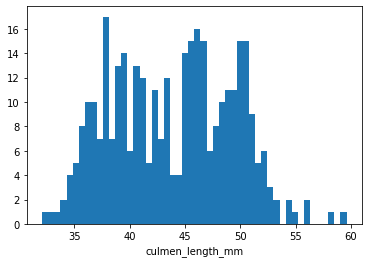

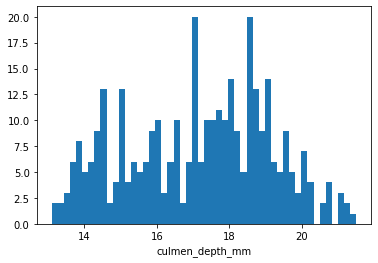

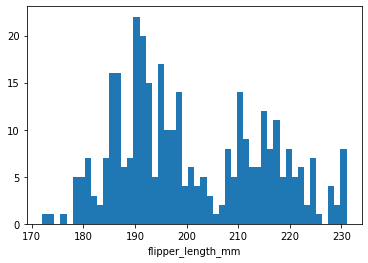

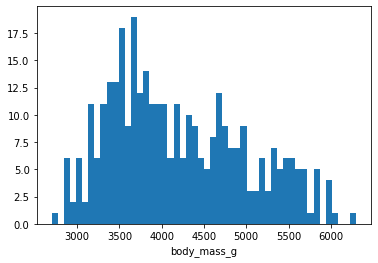

In [13]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

Функция позволяет задавать колонку и вид импьютации:

In [52]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

Выполняем функцию для всех пропущенных чисел с разными стратегиями заполнения колонок:

In [53]:
test_num_impute_col(data, 'culmen_length_mm', 'mean')

('culmen_length_mm', 'mean', 2, 43.9219298245614, 43.9219298245614)

In [54]:
test_num_impute_col(data, 'culmen_depth_mm', 'median')

('culmen_depth_mm', 'median', 2, 17.3, 17.3)

In [55]:
test_num_impute_col(data, 'flipper_length_mm', 'most_frequent')

('flipper_length_mm', 'most_frequent', 2, 190.0, 190.0)

In [56]:
test_num_impute_col(data, 'body_mass_g', 'most_frequent')

('body_mass_g', 'most_frequent', 2, 3800.0, 3800.0)

**Обработка пропусков в категориальных данных**

Выберем категориальные колонки с пропущенными значениями:

In [41]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка sex. Тип данных object. Количество пустых значений 10, 2.91%.


In [42]:
cat_temp_data = data[['sex']]
cat_temp_data.head()

,sex
0,MALE
1,FEMALE
2,FEMALE
3,NaN
4,FEMALE


In [43]:
cat_temp_data['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

Импьютация наиболее частыми значениями:

In [70]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['MALE'],
       ['FEMALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['MALE'],
       ['MALE'],
       ['MALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['MALE'],
       ['FEMALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['MALE'],
       ['FEMALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['MALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE'],
       ['FEMALE'],
       ['MALE']

In [71]:
np.unique(data_imp2)

array(['.', 'FEMALE', 'MALE'], dtype=object)

## **Преобразование категориальных признаков в числовые**

### **Использование LabelEncoder**

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
cat_enc = pd.DataFrame({'coded_sex':data_imp2.T[0]})
cat_enc

,coded_sex
0,MALE
1,FEMALE
2,FEMALE
3,MALE
4,FEMALE
...,...
339,MALE
340,FEMALE
341,MALE
342,FEMALE


Уникальные значения:

In [59]:
cat_enc['coded_sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [60]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['coded_sex'])

Закодированный категориальный признак:

In [61]:
cat_enc_le

array([2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1,

## **Масштабирование данных**

In [73]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### **MinMax масштабирование**

In [74]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['body_mass_g']])

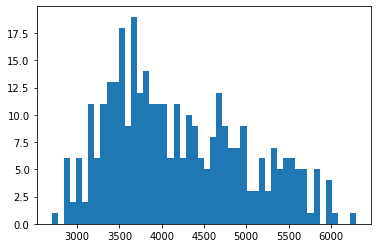

In [80]:
plt.hist(data['body_mass_g'], 50)
plt.show()

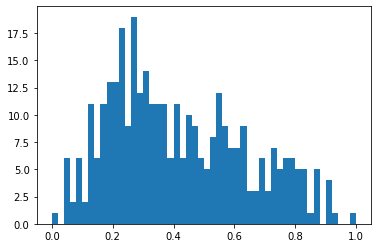

In [81]:
plt.hist(sc1_data, 50)
plt.show()

### **Масштабирование данных на основе Z-оценки**

In [82]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['body_mass_g']])

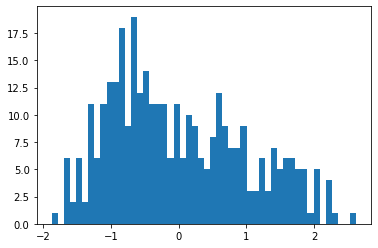

In [83]:
plt.hist(sc2_data, 50)
plt.show()